In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
Salarires_DF = pd.read_csv("performance_and_salries.csv")

In [3]:
Salarires_DF

,Unnamed: 0,Season_ending,Club,promoted_last_season,Position,Revenues,salaries
0,0,2000,Arsenal,0,2,61260000.0,33970000.0
1,1,2000,Aston Villa,0,6,35848000.0,21551000.0
2,2,2000,Bradford City,1,17,21072593.0,NaN
3,3,2000,Chelsea,0,5,106771000.0,48765000.0
4,4,2000,Coventry City,0,14,20134160.0,15818369.0
...,...,...,...,...,...,...,...
315,315,2015,Sunderland,0,16,101087000.0,77106000.0
316,316,2015,Swansea City,0,8,103928360.0,82540562.0
317,317,2015,Tottenham Hotspur,0,5,196377000.0,100832000.0
318,318,2015,West Bromwich Albion,0,13,96269000.0,69801000.0


Is there a correlation between Salary and Winning % ?

In [4]:
Salarires_DF.drop(columns= "Unnamed: 0").head()

,Season_ending,Club,promoted_last_season,Position,Revenues,salaries
0,2000,Arsenal,0,2,61260000.0,33970000.0
1,2000,Aston Villa,0,6,35848000.0,21551000.0
2,2000,Bradford City,1,17,21072593.0,NaN
3,2000,Chelsea,0,5,106771000.0,48765000.0
4,2000,Coventry City,0,14,20134160.0,15818369.0


In [5]:
Salarires_DF.sort_values(by="salaries", ascending= False).head()

,Unnamed: 0,Season_ending,Club,promoted_last_season,Position,Revenues,salaries
266,266,2013,Manchester City,0,2,271000000.0,233106000.0
303,303,2015,Chelsea,0,1,319456000.0,217067000.0
290,290,2014,Manchester United,0,7,433164000.0,214677000.0
289,289,2014,Manchester City,0,1,346512000.0,205044000.0
310,310,2015,Manchester United,0,4,395178000.0,202421000.0


In [6]:
Total_Salaries = Salarires_DF.groupby(["Season_ending"])["salaries"].sum().reset_index().rename(columns={"salaries": "Salaries", "salaries_y": "Season_Salaries"})

In [7]:
Total_Salaries

,Season_ending,Salaries
0,2000,4.673185e+08
1,2001,5.622860e+08
2,2002,6.765034e+08
3,2003,7.477382e+08
4,2004,7.980298e+08
5,2005,7.836889e+08
6,2006,8.671860e+08
7,2007,9.506965e+08
8,2008,1.188491e+09
9,2009,1.248423e+09


Reason for error code was because I was not pulling the correct column from each data set 

In [8]:
Salarires_DF["Season_Salary"] = Total_Salaries["Salaries"]

In [9]:
Salarires_DF

,Unnamed: 0,Season_ending,Club,promoted_last_season,Position,Revenues,salaries,Season_Salary
0,0,2000,Arsenal,0,2,61260000.0,33970000.0,467318483.0
1,1,2000,Aston Villa,0,6,35848000.0,21551000.0,562286010.0
2,2,2000,Bradford City,1,17,21072593.0,NaN,676503369.0
3,3,2000,Chelsea,0,5,106771000.0,48765000.0,747738215.0
4,4,2000,Coventry City,0,14,20134160.0,15818369.0,798029773.0
...,...,...,...,...,...,...,...,...
315,315,2015,Sunderland,0,16,101087000.0,77106000.0,NaN
316,316,2015,Swansea City,0,8,103928360.0,82540562.0,NaN
317,317,2015,Tottenham Hotspur,0,5,196377000.0,100832000.0,NaN
318,318,2015,West Bromwich Albion,0,13,96269000.0,69801000.0,NaN


Below is to change the type of data to float 

In [10]:
pd.options.display.float_format = '{:.0f}'.format

In [11]:
Salarires_DF = pd.merge(Salarires_DF, Total_Salaries, on= ["Season_ending"])

33,970,000 weekly Salary 
467,318,483 yearly Salary 

In [12]:
Salarires_DF["Percent_of_League_Salary"] = Salarires_DF ["salaries"] / Salarires_DF["Season_Salary"]

Not sure why he computed salary this way.  Let's wait and see why 

In [13]:
Salarires_DF ["Position_mul"] = -Salarires_DF["Position"]

Reason for - is because the higher the number the worse position (same as negative numbers) 

<Axes: xlabel='Percent_of_League_Salary', ylabel='Position_mul'>

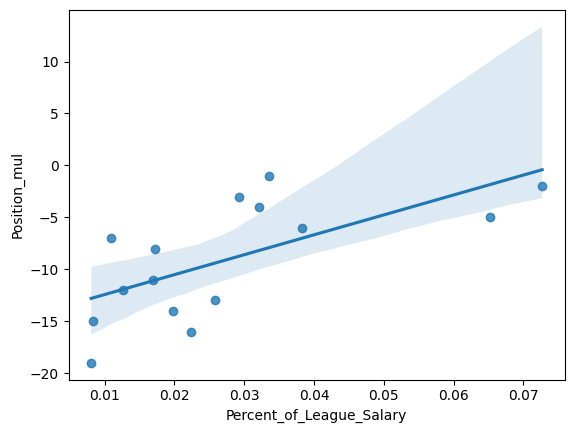

In [14]:
sns.regplot(x="Percent_of_League_Salary", y="Position_mul", data= Salarires_DF)

In [15]:
Salarires_DF ["Percent_of_League_Salary"].corr(Salarires_DF["Position_mul"])

0.6560305085667486

Data Transformation: Logarithmic transformations are often used to convert data that follows a skewed or exponential distribution into a more normally distributed form. This can be useful in statistical analysis and machine learning, as it can help stabilize variances and make data more suitable for certain algorithms.

Scaling Data: Logarithmic scaling can be used to scale data. It compresses large values and expands small values, making it easier to visualize or analyze data that spans multiple orders of magnitude.

In [16]:
Salarires_DF["pos_log"] = -np.log(Salarires_DF["Position"])

In [17]:
import statsmodels.formula.api as smf

In [18]:
avg_reg = smf.ols(formula= 'pos_log ~ Percent_of_League_Salary', data= Salarires_DF).fit()

In [19]:
avg_reg.summary()

c:\Users\JohnW\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pos_log   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     8.759
Date:                Wed, 31 Jan 2024   Prob (F-statistic):             0.0111
Time:                        13:18:22   Log-Likelihood:                -14.500
No. Observations:                  15   AIC:                             33.00
Df Residuals:                      13   BIC:                             34.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.7146      0.315     -8.608      0.000      -3.396      -2.033
Percent_of_League_Salary    28.0751      9.486      2.960      0.011       7.581      48.569
==============================================================================
Omnibus:                        9.509   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.766
Skew:                           1.324   Prob(JB):                       0.0560
Kurtosis:                       4.487   Cond. No.                         53.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: 

There is a correlation (.6) between % of league salary spent and the overall position.  #Weak correlation 

We can reject the null hypothesis that there is no correlation between % spent and position 

The data does not strongly fit the line of best fit (.4), therefore we can not accurately predict/confidently say the connnection between % salary spent and overall position 



